#  Logistic Regression

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_formate = 'retina'

# Prepare dataset
url = 'https://github.com/prasertcbs/basic-dataset/raw/master/study_hours.csv'
df = pd.read_csv(url)
# df.sample(10)
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Hours,0.5,0.75,1.0,1.25,1.5,1.75,1.75,2.0,2.25,2.5,2.75,3.0,3.25,3.5,4.0,4.25,4.5,4.75,5.0,5.5
Pass,0.0,0.00,0.0,0.00,0.0,0.00,1.00,0.0,1.00,0.0,1.00,0.0,1.00,0.0,1.0,1.00,1.0,1.00,1.0,1.0


## Data Exploration

<AxesSubplot: xlabel='Hours', ylabel='Pass'>

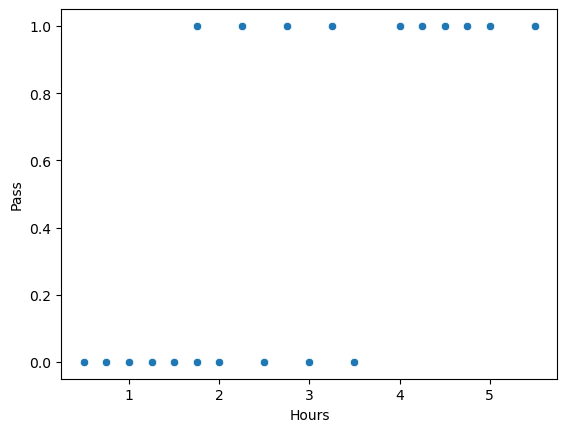

In [3]:
sns.scatterplot(data=df, x='Hours',y='Pass')

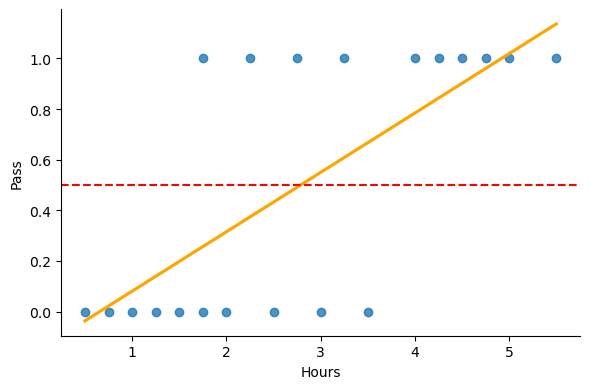

In [5]:
sns.lmplot(data=df, x='Hours',y='Pass',
          logistic=False, ci=None, height=4, aspect=1.5,
          line_kws={'color':'orange'})
plt.axhline(.5, color='red',linestyle='--');

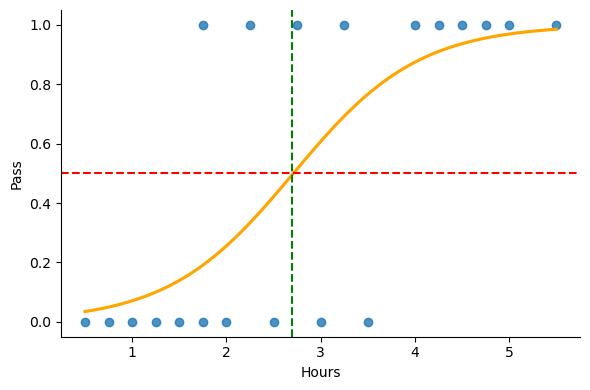

In [8]:
sns.lmplot(data=df, x='Hours',y='Pass',
          logistic=True, ci=None, height=4, aspect=1.5,
          line_kws={'color':'orange'})
plt.axhline(.5, color='red',linestyle='--')
plt.axvline(2.7, color='green',linestyle='--');

### Analyst with Statsmodels

In [12]:
from patsy import dmatrices
import statsmodels.api as sm

y, X = dmatrices('Pass ~ Hours', data=df, return_type='dataframe')

In [13]:
X.head()

,Intercept,Hours
0,1.0,0.50
1,1.0,0.75
2,1.0,1.00
3,1.0,1.25
4,1.0,1.50


In [14]:
y.head()

,Pass
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


### Model_a (with intercept)

In [15]:
model_a = sm.Logit(y, X).fit()
model_a.summary()

Optimization terminated successfully.
         Current function value: 0.401494
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Pass   No. Observations:                   20
Model:                          Logit   Df Residuals:                       18
Method:                           MLE   Df Model:                            1
Date:                Sun, 18 Dec 2022   Pseudo R-squ.:                  0.4208
Time:                        10:01:17   Log-Likelihood:                -8.0299
converged:                       True   LL-Null:                       -13.863
Covariance Type:            nonrobust   LLR p-value:                 0.0006365
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.0777      1.761     -2.316      0.021      -7.529      -0.626
Hours          1.5046      0.629      2.393      0.017       0.272       2.737
==============================================================================
"""

In [16]:
model_a.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.421     
Dependent Variable: Pass             AIC:              20.0598   
Date:               2022-12-18 10:02 BIC:              22.0512   
No. Observations:   20               Log-Likelihood:   -8.0299   
Df Model:           1                LL-Null:          -13.863   
Df Residuals:       18               LLR p-value:      0.00063648
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     -4.0777    1.7610  -2.3156  0.0206  -7.5292  -0.6262
Hours          1.5046    0.6287   2.3932  0.0167   0.2724   2.7369
=================================================================

"""

In [17]:
model_a.predict([[1,2],
                 [1,4]])

array([0.25570318, 0.8744475 ])